# Credit Risk Modeling
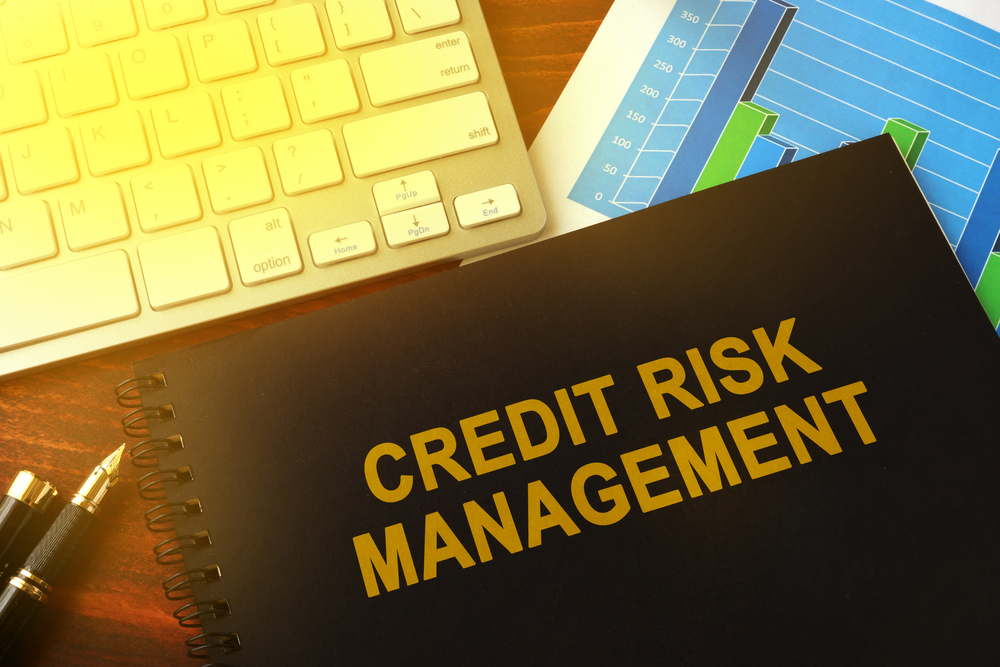

> "Credit risk is the possibility of a loss resulting from a borrower's failure to repay a loan or meet contractual obligations. Traditionally, it refers to the risk that a lender may not receive the owed principal and interest, which results in an interruption of cash flows and increased costs for collection.

> Although it's impossible to know exactly who will default on obligations, properly assessing and managing credit risk can lessen the severity of a loss. Interest payments from the borrower or issuer of a debt obligation are a lender's or investor's reward for assuming credit risk..."

Definition from https://www.investopedia.com/

When a customer applies for a loan, financial institutions, such as banks, rely on statistical models to assess whether the loan should be approved, based on the probability of repayment. The evaluation of this probability involves intricate factors, necessitating thorough statistical analysis and modeling to forecast the result for each unique application.

In this project, a dataset consisting of over 111,000 loan records will be explored and cleaned to determine the best way to predict whether a loan applicant will fully repay or default on a loan. Then, we'll build a machine learning model that returns the unique loan ID and a loan status label that indicates whether the loan will be fully paid or charged off.

Let's start by importing the neccesary libraries and the data:

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




CRM_data = pd.read_csv("/content/CRM_data.csv")
CRM_data

<ipython-input-36-41e65759bd14>:9: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  CRM_data = pd.read_csv("/content/CRM_data.csv")


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,503f01e2-c3c4-4b10-886e-f15de57b6f1a,27a17610-1d8c-48a7-b0db-2d81a4fa099a,Fully Paid,15654,Long Term,686.0,10+ years,Rent,43050.0,Debt Consolidation,889.69,14.1,49.0,18,0,14730,29757,0.0,0.0
111103,8af53bc0-56a4-4801-a960-52a46a90b33f,c124ca71-f42a-47cc-8ec2-236f7e9868a5,Fully Paid,15237,Short Term,706.0,10+ years,Home Mortgage,60948.0,Debt Consolidation,700.9,15.9,48.0,11,0,17733,23060,0.0,0.0
111104,96efd327-f965-42ae-8b2b-d2555205ce19,7d959a54-8eeb-4df6-b582-046f889e4cff,Fully Paid,10413,Short Term,719.0,5 years,Home Mortgage,66945.0,Debt Consolidation,1210.59,8.7,NaN,11,0,5205,6348,0.0,0.0
111105,ec19166c-70c5-4d49-adb6-fb3fc15024a2,5723fbf2-1ce8-4752-8bee-1bebf339f278,Fully Paid,34447,Short Term,626.0,10+ years,Home Mortgage,78736.0,Debt Consolidation,1476.3,30.4,9.0,12,0,32318,37580,0.0,0.0


In [37]:
CRM_data["Purpose"].unique()

array(['Debt Consolidation', 'Home Improvements', 'other',
       'Business Loan', 'small_business', 'Other', 'moving', 'Buy a Car',
       'Medical Bills', 'Buy House', 'Take a Trip', 'vacation',
       'major_purchase', 'Educational Expenses', 'wedding',
       'renewable_energy'], dtype=object)

The dataset consists of the following fields:
- **Loan ID**: A unique Identifier for the loan information.
- **Customer ID**: A unique identifier for the customer. Customers may have more than one loan.
- **Loan Status**: A categorical variable indicating if the loan was paid back or defaulted.
- **Current Loan Amount**: This is the loan amount that was either completely paid off, or the amount that was defaulted.
- **Term**: A categorical variable indicating if it is a short term or long term loan.
- **Credit Score**: A value between 0 and 800 indicating the riskiness of the borrower’s credit history.
- **Years in current job**: A categorical variable indicating how many years the customer has been in their current job.
- **Home Ownership**: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", "HaveMortgage" and "Own".
- **Annual Income**: The customer's annual income
- **Purpose**: A description of the purpose of the loan.
- **Monthly Debt**: The customer's monthly payment for their existing loans
- **Years of Credit History**: The years since the first entry in the customer’s credit history
- **Months since last delinquent**: Months since the last loan delinquent payment
- **Number of Open Accounts**: The total number of open credit cards
- **Number of Credit Problems**: The number of credit problems in the customer records.
- **Current Credit Balance**: The current total debt for the customer
- **Maximum Open Credit**: The maximum credit limit for all credit sources.
- **Bankruptcies**: The number of bankruptcies
- **Tax Liens**: The number of tax liens.


.

Following, we'll take a look at the missing data

In [38]:
CRM_data.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

As we can see, there's a lot of missing data in columns "Credit Score", "Annual Income", "Months since last delinquent").

Much more than just 5% of data is missing in these columns (50% aproximatelly), so we can't just drop the rows. Moreover, as these columns represent enourmosly important data for the analysis, we can't ignore them either.

A reasonable option is to impute this information with the mean of all other observations. Missing data in "Bankruptcies" and "Years in current job" can be imputed as well.

Missing data in the rest of the columns represents much less than 1%, so we can just drop those rows without losing significant data.

In [39]:
CRM_data_clean = CRM_data.copy()
CRM_data_clean['Credit Score'].fillna(CRM_data_clean['Credit Score'].mean(), inplace=True)
CRM_data_clean['Annual Income'].fillna(CRM_data_clean['Annual Income'].mean(), inplace=True)
CRM_data_clean['Months since last delinquent'].fillna(int(CRM_data_clean['Months since last delinquent'].mean()), inplace=True)

CRM_data_clean['Bankruptcies'].fillna(int(CRM_data_clean['Bankruptcies'].mean()), inplace=True)

#print(CRM_data_clean['Years in current job'].unique())

# As "Years in current job" is a categorical string variable, the processing is a little more complex.
# In order to get the mean from this column, we'll define the following function:

def get_years(years_str):

  # Handle NaN values
  if isinstance(years_str, float):
    return None

  elif years_str == "< 1 year":
    return 0.5

  number= years_str.replace('years', '').replace('year', '').replace('<', '').replace('+', '').strip()
  return float(number)


CRM_data_clean['Years in current job'] = CRM_data_clean['Years in current job'].apply(get_years)
CRM_data_clean['Years in current job'].fillna(CRM_data_clean['Years in current job'].mean(), inplace=True)

CRM_data_clean["Maximum Open Credit"] = CRM_data_clean["Maximum Open Credit"].replace({'#VALUE!': None})

CRM_data_clean.dropna(inplace=True)
CRM_data_clean["Monthly Debt"] = CRM_data_clean["Monthly Debt"].apply(lambda x: float(str(x).replace("$", "")))


CRM_data_clean.isna().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

Once data is totally clean, we can start creating the predicting model. Down below we'll divide into explanatory variables from explained variable, encode categorical variables and then split the data into train and test sets.

In [40]:
X = CRM_data_clean.drop(['Loan ID','Customer ID','Loan Status'], axis=1)
y = CRM_data_clean['Loan Status']

categorical_columns = ['Term', 'Home Ownership', 'Purpose']

X= pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Create RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Get accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8208740267338764


The model got an accuracy of 0.82, which is not bad at all.

It's worth noting that further optimization can potentially lead to an even better model through hyperparameter tuning. Unfortunately, due to insufficient computational power (and time), this step could not be completed within this notebook, but you'll find the code for this process at the end.

Our model is prepared for utilization. Next, we'll create a user-friendly function to incorporate this model for executing the intended task.

In [42]:
def CreditRiskModel(Loans_data):
    """
    Function to predict loan status using a pre-trained model and input loan data

    Parameters:
    - Loans_data: DataFrame containing loan data with columns Loan ID, Customer ID, Loan Status,
                  and features used for prediction

    Returns:
    - DataFrame containing Loan ID and predicted Loan Status
    """


    # Process data function
    def process_data(data):
        # Remove unnecessary columns and one-hot encode categorical columns
        X = data.drop(['Loan ID','Customer ID','Loan Status'], axis=1)
        categorical_columns = ['Term', 'Home Ownership', 'Purpose']
        X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
        return X

    # Extract Loan ID column
    Loan_ID = Loans_data['Loan ID']

    # Process loan data
    X = process_data(Loans_data)

    # Predict loan status using a pre-trained model
    y_pred = model.predict(X)

    # Create DataFrame with Loan ID and predicted Loan Status
    Loan_Status = pd.DataFrame({'Loan ID': Loan_ID, 'Loan Status': y_pred})

    return Loan_Status


Our credit risk model achieved a commendable accuracy of 82.09%, indicating its effectiveness in predicting creditworthiness. This demonstrates promising performance in discerning between creditworthy and non-creditworthy applicants.

Moving forward, further optimization and refinement of the model could potentially enhance its predictive power and generalization capabilities. Following this text, you'll find a cell with code for hyperparameter tuning.

Overall, the obtained model represents a significant step towards making informed lending decisions. This enhances responsible lending practices, crucial for financial institutions in mitigating risks associated with lending, thus safeguarding the financial health of both lenders and borrowers.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

# Instantiate 10-fold CV grid search object
grid = GridSearchCV(estimator = model,
                    param_grid = params,
                    scoring = 'accuracy',
                    cv= 3,
                    n_jobs= -1)

# Fit 'grid' to the training data
grid.fit(X_train, y_train)

In [ ]:
# Extract best hyperparameters
best_hyperparams = grid.best_params_
print('Best hyperparameters:\n', best_hyperparams)

# Extract best CV score
best_CV_score = grid.best_score_
print('Best CV accuracy:\n', best_CV_score)

# Extract best model
best_model = grid.best_estimator_

# Evaluate test set accuracy
best_acc = best_model.score(X_test, y_test)

print("Test set accuracy of best model: {:.3f}".format(best_acc))